# Import Library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Pixel Operations

In [2]:
def pixel_operations(image):
    """Áp dụng phép toán điểm ảnh: biến đổi độ sáng và độ tương phản"""
    bright = cv2.convertScaleAbs(image, alpha=1.2, beta=30)  # Tăng sáng
    return bright

# Histogram Equalization

In [3]:
def histogram_equalization(image):
    """Cân bằng Histogram trên ảnh xám"""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    equalized = cv2.equalizeHist(gray)
    return equalized

# Difference of Gaussian

In [4]:
def difference_of_gaussian(image):
    """Lọc ảnh DoG (Hiệu hai Gauss)"""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur1 = cv2.GaussianBlur(gray, (5, 5), 1)
    blur2 = cv2.GaussianBlur(gray, (5, 5), 2)
    dog = blur1 - blur2
    return dog

# Laplacian of Gaussian

In [5]:
def laplacian_of_gaussian(image):
    """Lọc ảnh LoG (Laplacian of Gaussian)"""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    log = cv2.Laplacian(blur, cv2.CV_64F)
    return log

# Image Restoration


In [6]:
def image_restoration(image):
    """Khôi phục ảnh bằng bộ lọc trung vị (Median Filter)"""
    restored = cv2.medianBlur(image, 5)
    return restored

# Main

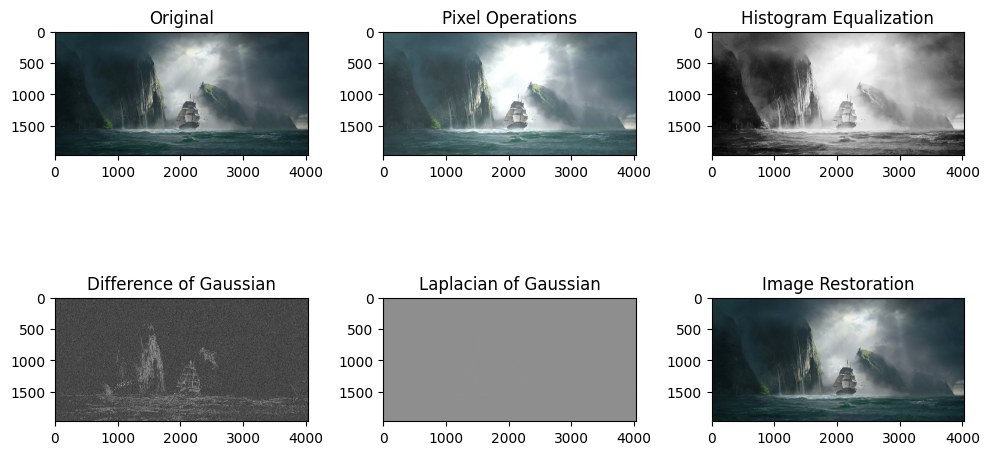

In [7]:
# Đọc ảnh
def main():
    image = cv2.imread("Image/shipInFog.jpeg")  # Đọc ảnh đầu vào
    
    pixel_img = pixel_operations(image)
    hist_eq_img = histogram_equalization(image)
    dog_img = difference_of_gaussian(image)
    log_img = laplacian_of_gaussian(image)
    restored_img = image_restoration(image)
    
    # Hiển thị kết quả
    plt.figure(figsize=(10, 6))
    
    plt.subplot(2, 3, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original")
    plt.subplot(2, 3, 2), plt.imshow(cv2.cvtColor(pixel_img, cv2.COLOR_BGR2RGB)), plt.title("Pixel Operations")
    plt.subplot(2, 3, 3), plt.imshow(hist_eq_img, cmap='gray'), plt.title("Histogram Equalization")
    plt.subplot(2, 3, 4), plt.imshow(dog_img, cmap='gray'), plt.title("Difference of Gaussian")
    plt.subplot(2, 3, 5), plt.imshow(log_img, cmap='gray'), plt.title("Laplacian of Gaussian")
    plt.subplot(2, 3, 6), plt.imshow(cv2.cvtColor(restored_img, cv2.COLOR_BGR2RGB)), plt.title("Image Restoration")
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()